In [1]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats
import geopandas as gpd
import rasterio
from rasterio.plot import show
import seaborn as sns

In [2]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir=f"{proj_dir}/results"

In [3]:
#you can get this table from the SCAN dryad link
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


# Get results from other analyses

In [4]:
Path(f"{results_dir}/combined").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/combined")

In [5]:
its_df=pd.read_csv(f"{proj_dir}/results/sanger/its_class.csv", sep=",", keep_default_na=False,)
its_df

,wgs_id,its_id,its_seq,genotype_label,diagnostic_genotype,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,its_class
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,GATAT,G,A,T,A,T,SBxSB
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
...,...,...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,AGCGC,A,G,C,G,C,SHxSH
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,AGCGC,A,G,C,G,C,SHxSH
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH


In [6]:
mito_df=pd.read_csv(f"{proj_dir}/results/mito_read_count/mito_confidence.csv", sep=",", header=0)
mito_df

,sample_id,top_genome,runner_up,top_count,runner_count,total_reads,top_fraction,binom_pval_runner,flag
0,Sb_NG_ak_1.1,s_bovis,s_curassoni,138219,8045,154547,0.894349,0.0,OK
1,Sb_NG_ak_2.1,s_bovis,s_guineensis,101157,6530,115295,0.877375,0.0,OK
2,Sb_NG_ak_2.2,s_bovis,s_guineensis,244206,14624,274375,0.890045,0.0,OK
3,Sb_NG_ak_2.3,s_bovis,s_curassoni,97761,6068,109927,0.889327,0.0,OK
4,Sb_NG_ak_3.1,s_bovis,s_curassoni,231388,10569,252973,0.914675,0.0,OK
...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,s_haematobium,s_intercalatum,56771,1752,60378,0.940260,0.0,OK
201,c_Sh_NG_os_3_11,s_haematobium,s_intercalatum,5566,113,5794,0.960649,0.0,OK
202,c_Sh_NG_os_3_5,s_haematobium,s_intercalatum,16151,331,16833,0.959484,0.0,OK
203,c_Sh_NG_os_3_6,s_haematobium,s_intercalatum,47037,341,47831,0.983400,0.0,OK


In [7]:
pca_df=pd.read_csv(f"{proj_dir}/results/pca/pca.raw.csv", sep=",", header=0)
pca_df

,fid,wgs_id,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,ERR3012900,ERR3012900,0.127035,0.096575,-0.007914,-0.008089,0.002074,0.001486,-0.007485,0.001296,...,0.001378,0.003953,0.003379,-0.001405,0.015783,-0.019479,-0.020299,0.007567,-0.119611,-0.004627
1,ERR3012901,ERR3012901,0.127335,0.095973,-0.008921,-0.008169,0.000972,0.002832,-0.005712,-0.001796,...,0.005075,0.007011,0.004148,-0.012539,0.007286,-0.019631,-0.015529,0.003117,-0.096726,0.002388
2,ERR3012902,ERR3012902,0.159793,0.273780,-0.009177,-0.001562,0.001705,0.002788,-0.001865,0.002726,...,0.009444,-0.000149,-0.003347,0.004526,-0.005984,0.008526,0.011544,-0.004839,0.042547,-0.001146
3,ERR3012903,ERR3012903,0.127318,0.096197,-0.009191,-0.008209,0.002268,0.003252,-0.005400,0.000283,...,0.002992,0.005423,0.001644,0.008578,0.014265,-0.017453,-0.019601,0.008702,-0.111107,-0.000556
4,ERR3012904,ERR3012904,0.127315,0.096283,-0.008683,-0.006868,0.001194,0.001075,-0.005933,0.001070,...,0.003099,0.007453,0.005063,0.002153,0.011825,-0.021991,-0.019456,0.011000,-0.115009,-0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,c_Sh_NG_os_2_2,c_Sh_NG_os_2_2,-0.051976,0.009795,-0.048381,-0.017170,-0.000054,-0.008614,-0.072020,-0.016512,...,0.042293,0.029838,0.012960,0.011162,-0.013608,-0.000706,-0.004528,-0.008224,0.010048,-0.045300
196,c_Sh_NG_os_3_11,c_Sh_NG_os_3_11,-0.049502,0.009141,-0.050689,-0.015017,0.027602,0.014697,-0.054453,-0.052379,...,-0.011051,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351
197,c_Sh_NG_os_3_3,c_Sh_NG_os_3_3,-0.052228,0.009775,-0.068520,-0.024779,-0.006986,0.024916,-0.087718,-0.004124,...,0.065330,-0.015290,-0.046741,-0.009383,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109
198,c_Sh_NG_os_3_5,c_Sh_NG_os_3_5,-0.051540,0.010212,-0.059751,-0.019483,-0.007017,0.005133,-0.059528,-0.017235,...,0.061250,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584


In [8]:
adm_df = pd.read_csv(f"{proj_dir}/results/supervised_admixture/sup_adm_k3_df.mod.csv", sep=",", header=0)

# Merge WGS, MITO, and ITS data

In [9]:
df = info_df.merge(its_df, left_on=["wgs_id", "its_id"], right_on=["wgs_id", "its_id"], how="left")
df = df.merge(mito_df[["sample_id", "top_genome"]], left_on="wgs_id", right_on="sample_id", how="left")
df = df.rename(columns={"top_genome": "mitotype",
                        "genotype_label": "its_genotype_label"})
#clean up the mitotype label:
mito_label_mapping = dict(
    zip(df["mitotype"].unique(),
        [(x[0] + x[2]).upper() for x in df["mitotype"].unique()])
)

df["mitotype"] = df["mitotype"].map(mito_label_mapping)

df = df.merge(adm_df[["wgs_id", "adm0", "adm1", "adm2", "adm_group", "adm_xorder"]], on="wgs_id", how="left")
df = df.merge(pca_df, on="wgs_id", how="left")
df.drop("fid", axis=1, inplace=True)

locale_df = pd.DataFrame({
    "locale": ["borno", "kano", "kebbi", "kastina", "osun", "ebonyi", "kwara", "edo", "ondo"],
    "sh_population": ["N", "N", "N", "N", "S", "S", "S", "S", "S"]
})

df = df.merge(locale_df, on="locale", how="left")

df.to_csv("raw.merged.csv", sep=",", header=True, index=False)

df = df.loc[~df["species"].isin(['guineensis', 'intercalatum', 'matthei'])].reset_index(drop=True)
df.to_csv("merged.csv", sep=",", header=True, index=False)
df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,sh_population
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.006358,-0.020375,0.108408,0.028731,0.016279,0.002319,0.009262,0.064130,-0.011822,NaN
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.014729,-0.013940,0.067813,0.014646,0.013320,0.009242,0.001337,0.059829,0.002151,NaN
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.011701,-0.013872,0.084749,0.018241,0.021823,0.000826,0.003440,0.053144,0.002223,NaN
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,...,-0.010734,-0.012475,0.080161,0.019033,0.014301,0.008169,0.007875,0.067259,0.002167,NaN
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.008588,-0.003102,0.003312,-0.007419,-0.003614,0.013514,0.002070,0.055334,0.009031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205,S
198,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351,S
199,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584,S
200,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,0.002371,-0.001233,-0.012846,0.037577,-0.036532,-0.003324,-0.060917,0.022348,0.035746,S


# Numbers used in the manuscript

In [5]:
df=pd.read_csv("merged.csv", sep=",", header=0)
df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,sh_population
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.006358,-0.020375,0.108408,0.028731,0.016279,0.002319,0.009262,0.064130,-0.011822,NaN
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.014729,-0.013940,0.067813,0.014646,0.013320,0.009242,0.001337,0.059829,0.002151,NaN
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.011701,-0.013872,0.084749,0.018241,0.021823,0.000826,0.003440,0.053144,0.002223,NaN
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,...,-0.010734,-0.012475,0.080161,0.019033,0.014301,0.008169,0.007875,0.067259,0.002167,NaN
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.008588,-0.003102,0.003312,-0.007419,-0.003614,0.013514,0.002070,0.055334,0.009031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205,S
198,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351,S
199,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584,S
200,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,0.002371,-0.001233,-0.012846,0.037577,-0.036532,-0.003324,-0.060917,0.022348,0.035746,S


In [52]:
df["country"].value_counts()

country
nigeria       169
senegal        18
corsica         3
cdivoire        3
zambia          2
uganda          1
madagascar      1
angola          1
swaziland       1
namibia         1
lab             1
zanzibar        1
Name: count, dtype: int64

## ?How many samples from each species?

In [53]:
df["species"].value_counts()

species
shaematobium    138
sbovis           43
sbxsc             9
scurassoni        7
shxsb             4
margrebowiei      1
Name: count, dtype: int64

## ?How many samples from other publications?

In [54]:
len(df.loc[~df["sra"].isna()])

33

## ?How many Sh and Sb samples from Nigeria?

In [37]:
len(df.loc[df["country"]=="nigeria"])

169

In [38]:
df.loc[df["country"]=="nigeria"]["species"].value_counts()

species
shaematobium    132
sbovis           37
Name: count, dtype: int64

## ?How many samples were we able to get ITS genotypes for?

In [39]:
len(df.loc[df["its_seq"].notna()])

179

## ?How many samples are missing ITS genotypes?

In [152]:
len(df.loc[~df["its_seq"].notna()])

26

## ?How many samples were we able to get ITS genotypes for each species?

In [40]:
df.loc[df["its_seq"].notna(), "species"].value_counts()

species
shaematobium    138
sbovis           41
Name: count, dtype: int64

## ? How many unique ITS genotypes did we identify

In [41]:
len(df["its_genotype_label"].unique())-1

34

## ? How many unique SHAEMATOBIUM ITS genotypes did we identify

In [50]:
genotypes = df.loc[df["species"] == "shaematobium", "its_genotype_label"]
len(genotypes.value_counts())

27

In [55]:
genotypes.value_counts()

its_genotype_label
its-9_n44     44
its-14_n24    24
its-6_n22     22
its-17_n14    14
its-3_n7       7
its-18_n3      3
its-20_n2      2
its-19_n2      2
its-12_n2      2
its-24_n1      1
its-13_n1      1
its-26_n1      1
its-11_n1      1
its-22_n1      1
its-28_n1      1
its-23_n1      1
its-8_n1       1
its-10_n1      1
its-2_n1       1
its-7_n1       1
its-27_n1      1
its-4_n1       1
its-25_n1      1
its-5_n1       1
its-21_n1      1
its-15_n1      1
its-16_n1      1
Name: count, dtype: int64

In [68]:
tmp_df = df.loc[df["species"] == "shaematobium"]
tmp_df.loc[tmp_df["its_genotype_label"] == "its-9_n44", "country"].value_counts()

country
nigeria       42
madagascar     1
zanzibar       1
Name: count, dtype: int64

## ? How many unique SBOVIS ITS genotypes did we identify

In [56]:
genotypes = df.loc[df["species"] == "sbovis", "its_genotype_label"]
len(genotypes.value_counts())

7

In [57]:
genotypes.value_counts()

its_genotype_label
its-32_n34    34
its-29_n2      2
its-33_n1      1
its-34_n1      1
its-35_n1      1
its-31_n1      1
its-30_n1      1
Name: count, dtype: int64

In [60]:
genotypes.value_counts().sum()

np.int64(41)

In [69]:
tmp_df = df.loc[df["species"] == "sbovis"]
tmp_df.loc[tmp_df["its_genotype_label"] == "its-32_n34", "country"].value_counts()

country
nigeria     30
cdivoire     3
uganda       1
Name: count, dtype: int64

## ? How many unique ITS haplotypes only contain 1 individual

In [42]:
genotypes = df["its_genotype_label"].unique().astype(str)

# Count elements that end with '_n1'
np.sum([s.endswith('_n1') for s in genotypes])


np.int64(23)

### How many ITS genotypes

In [114]:
df.groupby(["diagnostic_genotype").apply(lambda g: pd.Series({
    "n_shaematobium": (g["species"] == "shaematobium").sum(),
    "n_sbovis": (g["species"] == "sbovis").sum(),
})).reset_index()


/tmp/ipykernel_45937/927617747.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("diagnostic_genotype").apply(lambda g: pd.Series({


,diagnostic_genotype,n_shaematobium,n_sbovis
0,AATAT,29,0
1,AGCGC,72,0
2,ARCRC,2,0
3,ARYAT,1,0
4,ARYRC,1,0
5,ARYRY,33,0
6,GATAT,0,41


In [119]:
df.groupby(['diagnostic_site_33', 'diagnostic_site_685', 'diagnostic_site_740',
       'diagnostic_site_790', 'diagnostic_site_860', "mitotype", "its_class"]).apply(lambda g: pd.Series({
    "n_shaematobium": (g["species"] == "shaematobium").sum(),
    "n_sbovis": (g["species"] == "sbovis").sum(),
})).reset_index()


/tmp/ipykernel_45937/787022980.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'diagnostic_site_790', 'diagnostic_site_860', "mitotype", "its_class"]).apply(lambda g: pd.Series({


,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,mitotype,its_class,n_shaematobium,n_sbovis
0,A,A,T,A,T,SB,SCxSC,28,0
1,A,A,T,A,T,SH,SCxSC,1,0
2,A,G,C,G,C,SB,SHxSH,24,0
3,A,G,C,G,C,SH,SHxSH,48,0
4,A,R,C,R,C,SB,SHxSC,1,0
5,A,R,C,R,C,SH,SHxSC,1,0
6,A,R,Y,A,T,SB,SHxSC,1,0
7,A,R,Y,R,C,SH,SHxSC,1,0
8,A,R,Y,R,Y,SB,SHxSC,19,0
9,A,R,Y,R,Y,SH,SHxSC,14,0


In [116]:
df.columns

Index(['wgs_id', 'its_id', 'sra', 'species', 'country', 'locale', 'patient',
       'miracidum', 'its_seq', 'its_genotype_label', 'diagnostic_genotype',
       'diagnostic_site_33', 'diagnostic_site_685', 'diagnostic_site_740',
       'diagnostic_site_790', 'diagnostic_site_860', 'its_class', 'sample_id',
       'mitotype', 'adm0', 'adm1', 'adm2', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5',
       'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14',
       'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'],
      dtype='object')

In [70]:
df.groupby(["its_class", "species"]).size().reset_index(name="count")

,its_class,species,count
0,SBxSB,sbovis,41
1,SCxSC,shaematobium,29
2,SHxSC,shaematobium,37
3,SHxSH,shaematobium,72


### How many Mitotypes

In [71]:
df.groupby(["species", "mitotype"]).size().reset_index(name="count")


,species,mitotype,count
0,margrebowiei,SM,1
1,sbovis,SB,43
2,sbxsc,SB,8
3,sbxsc,SC,1
4,scurassoni,SC,7
5,shaematobium,SB,73
6,shaematobium,SH,65
7,shxsb,SB,4


### How many from each major class

In [72]:
df.groupby(["species", "mitotype", "its_class"]).size().reset_index(name="count")

,species,mitotype,its_class,count
0,sbovis,SB,SBxSB,41
1,shaematobium,SB,SCxSC,28
2,shaematobium,SB,SHxSC,21
3,shaematobium,SB,SHxSH,24
4,shaematobium,SH,SCxSC,1
5,shaematobium,SH,SHxSC,16
6,shaematobium,SH,SHxSH,48


In [89]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].mean()*100

adm1    2.580206
dtype: float64

In [91]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].min()*100

adm1    0.001
dtype: float64

In [90]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].max()*100

adm1    14.4979
dtype: float64

# Plotting results

In [142]:
target_countries=["nigeria"]

sh   = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SHxSH") & (df["species"] == "shaematobium")), "adm2"]
sc   = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SCxSC") & (df["species"] == "shaematobium")), "adm2"]
scsh = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SHxSC") & (df["species"] == "shaematobium")), "adm2"]

In [147]:
scsh.mean()

np.float64(0.02961364864864866)

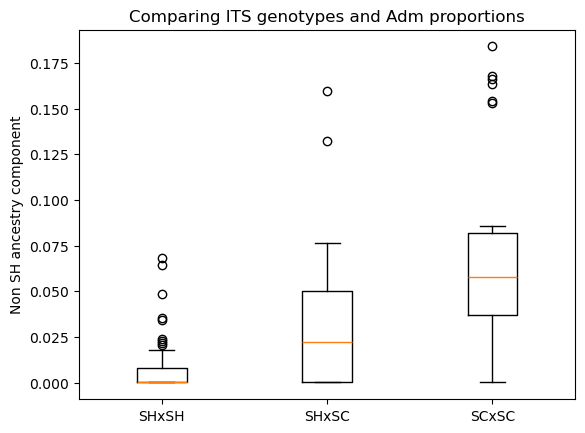

In [144]:

plt.boxplot([sh, scsh, sc], tick_labels=["SHxSH", "SHxSC", "SCxSC"])
plt.ylabel("Non SH ancestry component")
plt.title("Comparing ITS genotypes and Adm proportions")

plt.savefig("non_sh_boxplot.png", dpi=600, format="png", facecolor="white")
plt.savefig("non_sh_boxplot.svg", format="svg")

plt.show()

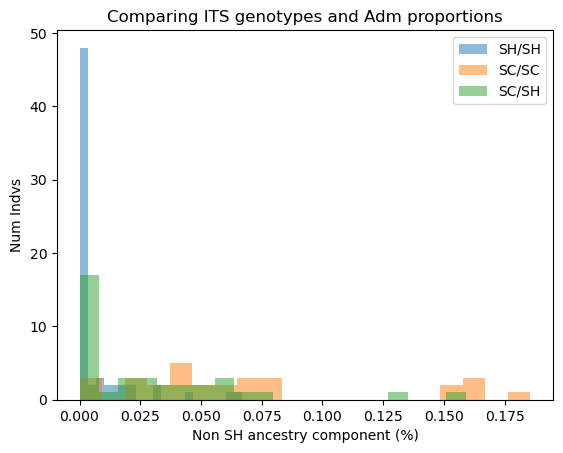

In [26]:
plt.hist(sh, bins=20, label="SH/SH", alpha=0.5)
plt.hist(sc, bins=20, label="SC/SC", alpha=0.5)
plt.hist(scsh, bins=20, label="SC/SH", alpha=0.5)
plt.legend()
plt.xlabel("Non SH ancestry component (%)")
plt.ylabel("Num Indvs")
plt.title("Comparing ITS genotypes and Adm proportions")

plt.savefig("non_sh_histogram.png", dpi=600, format="png", facecolor="white")
plt.savefig("non_sh_histogram.svg", format="svg")

plt.show()

In [27]:
import scikit_posthocs as sp

stat, p_value = stats.kruskal(sh, scsh, sc)

print(f"Kruskal-Wallis H test statistic: {stat}")
print(f"P-value: {p_value}")

# If the Kruskal-Wallis test is significant, perform pairwise Dunn's test
if p_value < 0.05:
    # Perform pairwise Dunn's test with Bonferroni correction
    dunn_result = sp.posthoc_dunn([sh, scsh, sc], p_adjust='bonferroni')
    print("Pairwise comparisons using Dunn's test with Bonferroni correction:")
    print(dunn_result)
else:
    print("The differences between the groups are not statistically significant, so pairwise tests are not necessary.")

Kruskal-Wallis H test statistic: 53.477711502345365
P-value: 2.4404083082590688e-12
Pairwise comparisons using Dunn's test with Bonferroni correction:
              1         2             3
1  1.000000e+00  0.004293  1.113406e-12
2  4.292681e-03  1.000000  3.050788e-04
3  1.113406e-12  0.000305  1.000000e+00


In [31]:
nigeria_sh_df = df.loc[(df["species"] == "shaematobium") & (df["country"] == "nigeria")].copy()
((1 - nigeria_sh_df.groupby("locale")["adm2"].agg(["min", "max", "mean"]))*100).rename({"min": "max", "max": "min"}, axis=1)[["min", "max", "mean"]]

,min,max,mean
locale,,,
borno,0.0020,0.6854,0.050814
ebonyi,13.2373,18.4074,16.016838
edo,0.7151,7.6371,3.697753
kano,0.0020,0.8782,0.059367
kastina,0.0020,0.0022,0.002018
kebbi,0.0020,0.9922,0.160910
kwara,0.4510,3.4362,1.979927
ondo,2.2432,8.5981,5.725400
osun,0.0020,0.3054,0.039925


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#get livestock introgression percentage
nigeria_sh_df["livestock_adm"] = 1 - nigeria_sh_df["adm2"]

# Fit linear model
model = smf.ols("livestock_adm ~ C(locale)", data=nigeria_sh_df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(locale),0.212225,8.0,194.967714,4.590957e-66
Residual,0.016736,123.0,NaN,NaN


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=nigeria_sh_df["livestock_adm"],
    groups=nigeria_sh_df["locale"],
    alpha=0.05
)

print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  borno  ebonyi   0.1597    0.0  0.1433   0.176   True
  borno     edo   0.0365    0.0  0.0235  0.0494   True
  borno    kano   0.0001    1.0 -0.0123  0.0125  False
  borno kastina  -0.0005    1.0 -0.0153  0.0144  False
  borno   kebbi   0.0011    1.0 -0.0141  0.0164  False
  borno   kwara   0.0193 0.0006  0.0056   0.033   True
  borno    ondo   0.0567    0.0  0.0443  0.0692   True
  borno    osun  -0.0001    1.0 -0.0164  0.0162  False
 ebonyi     edo  -0.1232    0.0 -0.1387 -0.1077   True
 ebonyi    kano  -0.1596    0.0 -0.1746 -0.1445   True
 ebonyi kastina  -0.1601    0.0 -0.1773  -0.143   True
 ebonyi   kebbi  -0.1586    0.0  -0.176 -0.1411   True
 ebonyi   kwara  -0.1404    0.0 -0.1565 -0.1242   True
 ebonyi    ondo  -0.1029    0.0  -0.118 -0.0878   True
 ebonyi    osun  -0.1598    0.0 -0.1782 -0.1414   True
    edo   

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from matplotlib.patches import Patch
import math

def add_scale_bar(ax, x0=3.0, y0=5.2, km=200, bar_height=0.20, n_segments=4, fontsize=10):
    """
    Draws a cartographic 1000 km (default) scale bar at (x0, y0) in lon/lat.
    Converts km to degrees of longitude using cos(latitude) at y0.
    """
    # 1 degree latitude ~ 111.32 km; 1 degree longitude ~ 111.32 * cos(lat)
    km_per_deg_lat = 111.32
    km_per_deg_lon = km_per_deg_lat * math.cos(math.radians(y0))
    if km_per_deg_lon <= 0:
        return
    deg = km / km_per_deg_lon  # horizontal length in degrees at latitude y0

    # alternating segments
    seg = deg / n_segments
    for i in range(n_segments):
        color = 'black' if i % 2 == 0 else 'white'
        ax.plot([x0 + i*seg, x0 + (i+1)*seg], [y0, y0],
                color=color, linewidth=6, solid_capstyle='butt', zorder=10)

    # thin outline line
    ax.plot([x0, x0 + deg], [y0, y0], color='black', linewidth=1, zorder=11)
    ax.text(x0 + deg/2, y0 - bar_height, f"{km:,} km", ha='center', va='top', fontsize=fontsize, zorder=11)

def compute_mean_values(df, value_col="adm1", count_col="count"):
    """
    Returns a DataFrame with columns: ['locale', <value_col>, 'count'].
    """
    if value_col not in df.columns:
        raise KeyError(f"`{value_col}` not found in df.columns: {list(df.columns)}")
    mv = df.groupby('locale')[value_col].mean().reset_index()
    counts = df['locale'].value_counts().rename_axis('locale').reset_index(name=count_col)
    return mv.merge(counts, on='locale')

def plot_map(ax, mean_values, nigeria_outline, rivers_lakes, raster, state_coords,
             value_col="adm1", eps=0.005, pie_linewidth=0.5,
             legend_labels=("mean $\\it{S.\\ haematobium}$ ancestry",
                            "mean non-$\\it{S.\\ haematobium}$ ancestry")):
    """
    Map with per-state pies from mean_values (expects: locale, <value_col>, count).
    """
    # sanity
    needed_cols = {"locale", value_col, "count"}
    missing = needed_cols - set(mean_values.columns)
    if missing:
        raise KeyError(f"mean_values missing columns: {missing}")

    # base layers (order: raster -> rivers -> outline -> pies)
    if raster is not None:
        show(raster, ax=ax, zorder=0)
    if rivers_lakes is not None and not rivers_lakes.empty:
        rivers_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, zorder=1)
    if nigeria_outline is not None and not nigeria_outline.empty:
        nigeria_outline.boundary.plot(ax=ax, linewidth=1, edgecolor='black', zorder=2)

    # pies
    for _, row in mean_values.iterrows():
        state = row['locale']
        if state not in state_coords:
            continue
        value = float(row[value_col])   # fraction for grey slice
        count = int(row['count'])
        x, y = state_coords[state]

        sizes = [value, 1 - value]
        colors = ['red', 'grey']

        # collapse nearly pure slices to a single wedge
        if sizes[0] > 1 - eps:
            sizes, colors = [1.0], ['red']
        elif sizes[0] < eps:
            sizes, colors = [1.0], ['grey']

        ax.pie(
            sizes, colors=colors, radius=0.5, center=(x, y),
            wedgeprops={'edgecolor': 'black',
                        'linewidth': pie_linewidth,
                        'alpha': 1,
                        'zorder': 6}  # <-- zorder goes HERE
        )

        ax.text(x, y + 0.6, f'{state}\n(n = {count})'.capitalize(),
                ha='center', fontsize=9, zorder=6)

    # view & aspect
    ax.set_xlim(2, 15)
    ax.set_ylim(4, 14)
    ax.set_aspect('equal')

    # legend
    pie_legend = [
        Patch(facecolor='red', edgecolor='black', label=legend_labels[0]),
        Patch(facecolor='grey',  edgecolor='black', label=legend_labels[1])
    ]
    ax.legend(handles=pie_legend, loc='lower left', frameon=True, fontsize=9, title_fontsize=10)

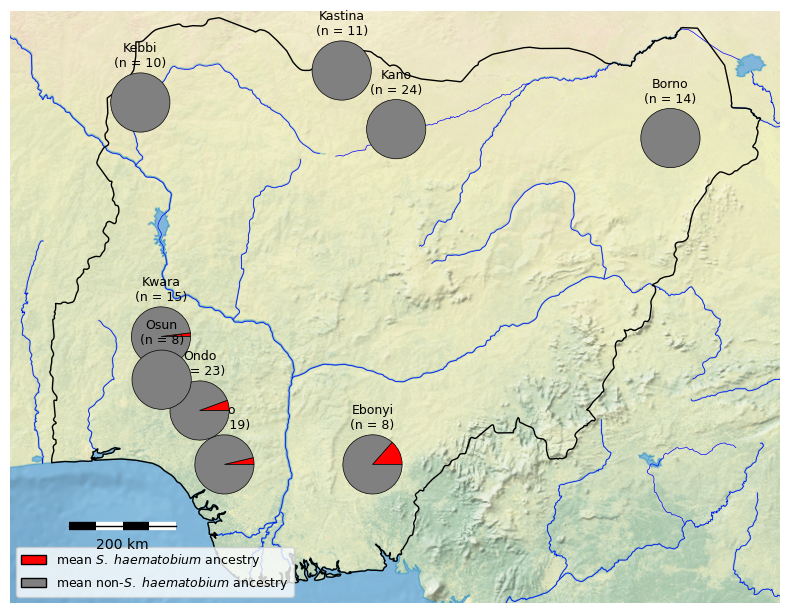

In [90]:
# Filter your data to Nigeria / Sh as desired
tmp_df = merged_df.loc[
    (merged_df["country"] == "nigeria") &
    (merged_df["species"].isin(["shaematobium"]))
].copy()

# Load layers
country_outline_path   = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_0_countries.shp'
rivers_lakes_path      = f'{proj_dir}/data/natural_earth_files/ne_10m_rivers_lake_centerlines.shp'
raster_image_path      = f'{proj_dir}/data/natural_earth_files/NE1_HR_LC_SR_W_DR.tif'

nigeria_outline  = gpd.read_file(country_outline_path)
rivers_lakes     = gpd.read_file(rivers_lakes_path)
raster           = rasterio.open(raster_image_path)

# Filter to Nigeria
nigeria_outline  = nigeria_outline[nigeria_outline['ADMIN'] == 'Nigeria'].copy()
rivers_lakes     = rivers_lakes  # (optional: subset to bbox if your file is large)

# Compute means (choose adm1 or adm2; keep consistent with plot_map value_col)
mean_values = compute_mean_values(tmp_df, value_col="adm1")

# ---- Map-only figure ----
fig, ax = plt.subplots(figsize=(8, 7))
plot_map(ax, mean_values, nigeria_outline, rivers_lakes, raster, state_coords, value_col="adm1")

# Scale bar (uses local latitude for better accuracy)
add_scale_bar(ax, x0=3.0, y0=5.3, km=200)

plt.tight_layout()
plt.show()

#save the figure as multiple file types
fig.savefig(f"{results_dir}/figures/figure_X-admixture_nigeria_map.png", format="png", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-admixture_nigeria_map.tiff", format="tiff", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-admixture_nigeria_map.png", format="png")

raster.close()

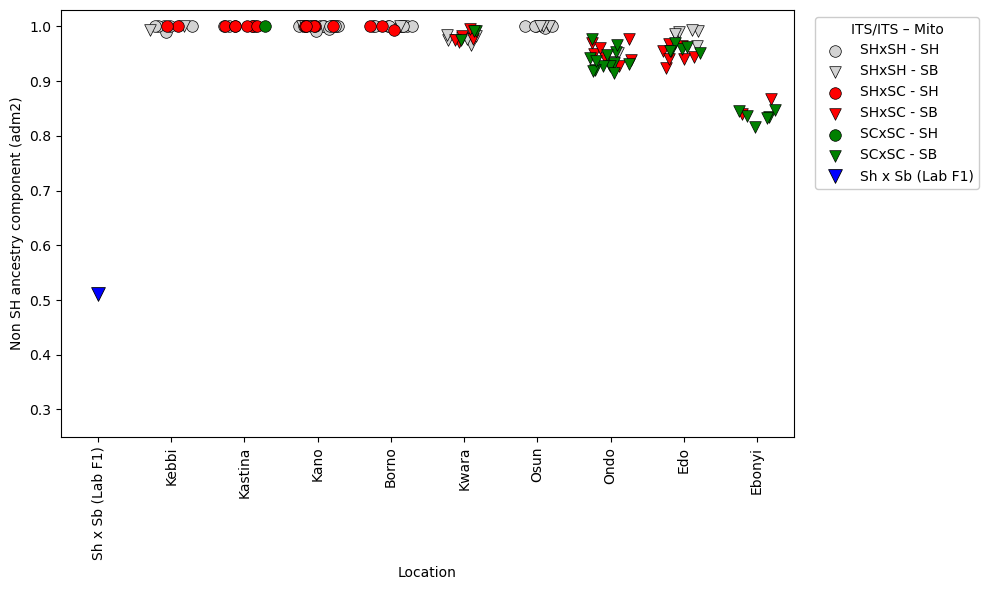

In [79]:
def plot_adm_scatter_panel(ax, merged_df, states_order,
                           value_col="adm2",
                           palette=None,
                           shape_mapping=None,
                           include_lab=True,
                           jitter_width=0.30,
                           point_size=70,
                           rng_seed=42,
                           legend_title="ITS/ITS – Mito"):
    """
    Scatter-only ancestry vs. locale panel.

    Parameters
    ----------
    ax : matplotlib Axes object to draw on.
    merged_df : DataFrame containing columns: locale, country, species, adm2, its_class, mitotype.
    states_order : list of locale names (in desired plotting order).
    value_col : admixture component to plot (default = "adm2").
    """

    # Defaults
    if palette is None:
        palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
    if shape_mapping is None:
        shape_mapping = {'SH': 'o', 'SB': 'v'}

    # ---- Extract field-only data ----
    df_field = merged_df.loc[
        (merged_df["country"] == "nigeria") &
        (merged_df["species"] == "shaematobium")
    ].copy()

    df_field = df_field.dropna(subset=[value_col])

    # Map states → x positions (1..N)
    state_mapping = {state: i for i, state in enumerate(states_order)}
    df_field["state_numeric"] = df_field["locale"].map(state_mapping)
    df_field = df_field.dropna(subset=["state_numeric"])
    df_field["x_plot"] = df_field["state_numeric"] + 1

    # Ensure genetics labels exist
    df_field["its_class_fmt"] = df_field["its_class"].astype(str)

    # ---- Scatter points with jitter ----
    rng = np.random.default_rng(rng_seed)
    labels_used = set()

    for genotype, color in palette.items():
        sub = df_field[df_field["its_class_fmt"] == genotype]
        if sub.empty: 
            continue
        for mito, shape in shape_mapping.items():
            sub2 = sub[sub["mitotype"] == mito]
            if sub2.empty:
                continue

            jitter = rng.uniform(-jitter_width, jitter_width, len(sub2))
            label = f"{genotype} - {mito}"
            use_label = label if label not in labels_used else None

            ax.scatter(
                sub2["x_plot"] + jitter,
                sub2[value_col],
                color=color, edgecolor="black", s=point_size,
                linewidths=0.5, marker=shape, alpha=1, zorder=4,
                label=use_label
            )
            labels_used.add(label)

    # ---- Optional Lab point at x = 0 ----
    if include_lab:
        lab = merged_df.loc[merged_df["country"] == "lab"]
        if lab.shape[0] > 0 and value_col in lab.columns:
            lab_value = float(lab[value_col].values[0])
            lab_mito = str(lab["mitotype"].values[0]) if "mitotype" in lab.columns else "SH"
            lab_marker = shape_mapping.get(lab_mito, "o")
            ax.scatter(
                0, lab_value,
                color="blue", edgecolor="black",
                s=point_size*1.4, linewidths=0.6,
                marker=lab_marker, zorder=6,
                label="Sh x Sb (Lab F1)"
            )
            xticks = [0] + list(range(1, len(states_order)+1))
            labels = ["Sh x Sb (Lab F1)"] + [s.capitalize() for s in states_order]
        else:
            xticks = list(range(1, len(states_order)+1))
            labels = [s.capitalize() for s in states_order]
    else:
        xticks = list(range(1, len(states_order)+1))
        labels = [s.capitalize() for s in states_order]

    # ---- Axis & Legend ----
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_xlim(min(xticks) - 0.5, max(xticks) + 0.5)
    ax.set_ylim(0.25, 1.03)
    ax.set_xlabel("Location")
    ax.set_ylabel(f"Non SH ancestry component ({value_col})")

    leg = ax.legend(title=legend_title, bbox_to_anchor=(1.02, 1),
                    loc="upper left", frameon=True)
    leg.get_frame().set_alpha(1)

    return ax


fig, ax = plt.subplots(figsize=(10, 6))

plot_adm_scatter_panel(
    ax,
    merged_df,
    states_order=["kebbi","kastina","kano","borno","kwara","osun","ondo","edo","ebonyi"],
    value_col="adm2"
)

plt.tight_layout()

#save the figure as multiple file types
fig.savefig(f"{results_dir}/figures/figure_X-admixure_vs_2marker_scatterplot.png", format="png", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-admixure_vs_2marker_scatterplot.tiff", format="tiff", dpi=600, facecolor="white")
fig.savefig(f"{results_dir}/figures/figure_X-admixure_vs_2marker_scatterplot.png", format="png")

plt.show()


In [82]:
def plot_admixture_panel(
    ax,
    merged_df,
    component_cols=("adm0", "adm1", "adm2"),
    adm_group_col="adm_group",
    adm_xorder_col="adm_xorder",
    gap_size=0.25,
    custom_labels=None,
    bar_width=1.0,
    edgecolor="black",
    bar_linewidth=0.1,
    y_label="Ancestry (k=3)",
    ylim=(0,1),
    show_group_separators=False,
    separator_kwargs=None,
    label_rotation=45,
    label_fontsize=10,
):
    """
    Render a supervised-admixture bar panel with gaps between groups.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Target axes (compatible with multi-panel figures).
    adm_df : pd.DataFrame
        Must have columns: component_cols, adm_group_col, adm_xorder_col.
    component_cols : tuple[str]
        Columns to stack (default: ('adm0','adm1','adm2')).
    adm_group_col : str
        Column with group/population name.
    adm_xorder_col : str
        Column controlling within-group order (integer/rank).
    gap_size : float
        Visible gap between consecutive groups (in x-units).
    custom_labels : dict or None
        Mapping group_name -> pretty label. Falls back to group_name if missing.
    show_group_separators : bool
        If True, draw thin vertical lines at group boundaries.
    separator_kwargs : dict or None
        Matplotlib line kwargs for separators (e.g., {'color':'k','lw':0.4}).
    """
    # ---- checks ----
    need = set(component_cols) | {adm_group_col, adm_xorder_col}
    missing = need - set(adm_df.columns)
    if missing:
        raise KeyError(f"adm_df is missing expected columns: {missing}")

    if separator_kwargs is None:
        separator_kwargs = dict(color="black", linewidth=0.3, alpha=1)

    custom_labels = custom_labels or {}

    # ---- prep & ordering ----
    df = adm_df.copy().sort_values(adm_xorder_col).reset_index(drop=True)

    # contiguous run-ids for each group (assumes rows are grouped by adm_group after sorting)
    group_change = (df[adm_group_col] != df[adm_group_col].shift()).fillna(True).to_numpy()
    df["run_id"] = np.cumsum(group_change) - 1

    # shift each group block by gap_size * run_id
    df["xpos"] = df[adm_xorder_col] + df["run_id"] * gap_size

    # ---- stacked bars ----
    bottom = np.zeros(len(df), dtype=float)
    for k in component_cols:
        vals = df[k].astype(float).to_numpy()
        ax.bar(
            df["xpos"], vals,
            bottom=bottom, width=bar_width,
            edgecolor=edgecolor, linewidth=bar_linewidth
        )
        bottom += vals

    # ---- group info (for labels and separators) ----
    group_info = (
        df.groupby(["run_id", adm_group_col])["xpos"]
          .agg(start="min", end="max")
          .reset_index()
          .sort_values("run_id")
          .reset_index(drop=True)
    )

    # optional separators at group boundaries
    if show_group_separators and len(group_info) > 1:
        for i in range(1, len(group_info)):
            start_this = group_info.loc[i, "start"]
            ax.axvline(start_this - gap_size/2, **separator_kwargs)

    # centered labels under each block (using custom labels if provided)
    for _, row in group_info.iterrows():
        center = 0.5 * (row["start"] + row["end"] + 1.0)
        gname = row[adm_group_col]
        label_text = custom_labels.get(gname, gname)
        ax.text(
            center, -0.01, label_text,
            rotation=label_rotation, ha="right", va="top",
            fontsize=label_fontsize, clip_on=False
        )

    # ---- axes styling ----
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_ylim(*ylim)
    ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5)
    ax.set_xticks([])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
    ax.tick_params(length=7, labelbottom=False)
    return ax


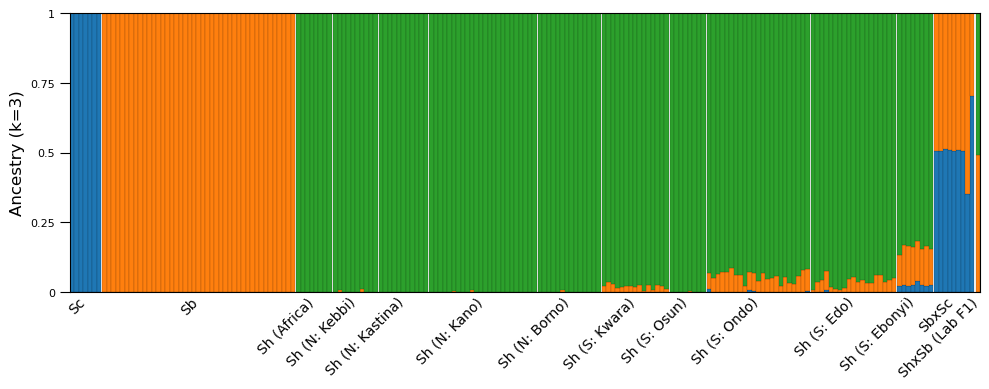

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

custom_labels = {
    "shaematobium-north-kebbi": "Sh (N: Kebbi)",
    "shaematobium-north-kastina": "Sh (N: Kastina)",
    "shaematobium-north-kano": "Sh (N: Kano)",
    "shaematobium-north-borno": "Sh (N: Borno)",
    "shaematobium-south-kwara": "Sh (S: Kwara)",
    "shaematobium-south-osun": "Sh (S: Osun)",
    "shaematobium-south-ondo": "Sh (S: Ondo)",
    "shaematobium-south-edo": "Sh (S: Edo)",
    "shaematobium-south-ebonyi": "Sh (S: Ebonyi)",
    "scurassoni": "Sc",
    "shaematobium-africa": "Sh (Africa)",
    "sbovis": "Sb",
    "sbxsc": "SbxSc",
    "shxsb": "ShxSb (Lab F1)",
}

fig, ax = plt.subplots(figsize=(10, 4))
plot_admixture_panel(
    ax,
    merged_df,
    component_cols=("adm0","adm1","adm2"),
    adm_group_col="adm_group",
    adm_xorder_col="adm_xorder",
    gap_size=0.25,
    custom_labels=custom_labels,
    show_group_separators=False  # set True if you want thin boundary lines
)
plt.tight_layout()

# display
plt.show()


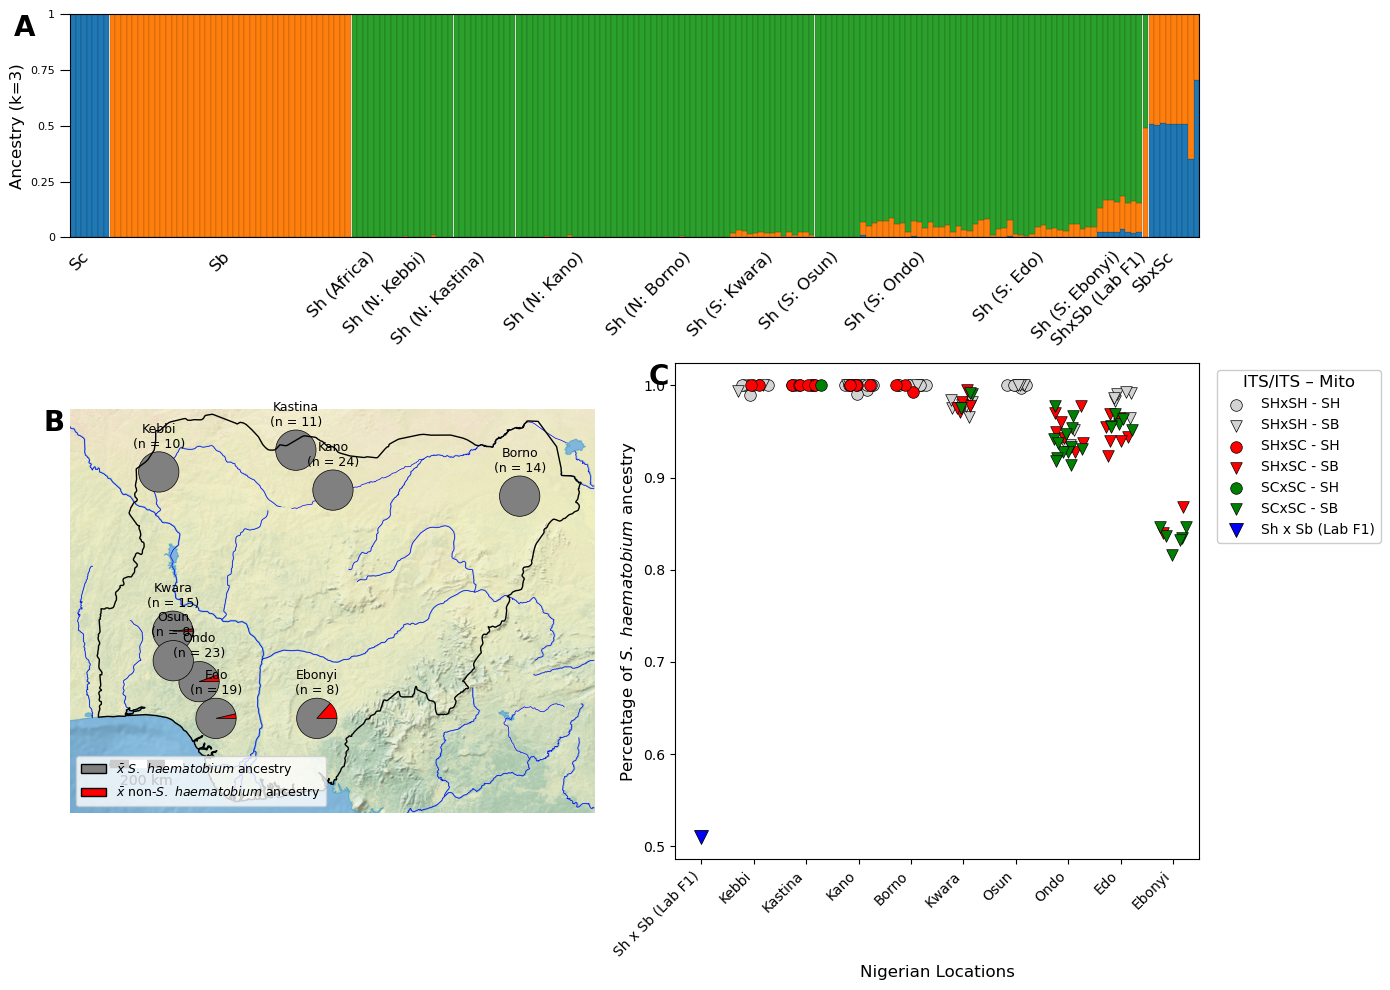

In [14]:
# --- imports (merge with your existing ones as needed) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio
from rasterio.plot import show
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# =============================
# CONFIG (edit as you like)
# =============================
K = 3
gap_size = 0.1  # visible gap between admixture groups
pie_linewidth = 0.5
EPS = 0.005     # threshold for collapsing nearly-1.0 pie slices

merged_df = pd.read_csv(f"{results_dir}/combined/merged.csv", sep=",", header=0)
adm_df = pd.read_csv(f"{proj_dir}/results/supervised_admixture/sup_adm_k3_df.mod.csv", sep=",", header=0)

# custom group labels for admixture top panel
pop_labels = {
    "shaematobium-north-kebbi": "Sh (N: Kebbi)",
    "shaematobium-north-kastina": "Sh (N: Kastina)",
    "shaematobium-north-kano": "Sh (N: Kano)",
    "shaematobium-north-borno": "Sh (N: Borno)",
    "shaematobium-south-kwara": "Sh (S: Kwara)",
    "shaematobium-south-osun": "Sh (S: Osun)",
    "shaematobium-south-ondo": "Sh (S: Ondo)",
    "shaematobium-south-edo": "Sh (S: Edo)",
    "shaematobium-south-ebonyi": "Sh (S: Ebonyi)",
    "scurassoni": "Sc",
    "shaematobium-africa": "Sh (Africa)",
    "sbovis": "Sb",
    "sbxsc": "SbxSc",
    "shxsb": "ShxSb (Lab F1)",
}

# Manual state coordinates (use your existing dict)
state_coords = {
    'ondo':   (5.2,  7.25),
    'kwara':  (4.55, 8.5),
    'edo':    (5.62, 6.34),
    'kano':   (8.52, 12.0),
    'borno':  (13.15, 11.85),
    'kebbi':  (4.2,  12.45),
    'kastina':(7.6,  12.99),
    'osun':   (4.56, 7.77),
    'ebonyi': (8.12, 6.34)
}

states_order=["kebbi","kastina","kano","borno","kwara","osun","ondo","edo","ebonyi"]

# ----- lab hybrid (single point, no ITS genotype) -----
lab_rows = merged_df.loc[merged_df["country"] == "lab"]
if lab_rows.shape[0] > 0:
    lab_value = float(lab_rows["adm2"].values[0])
    lab_mito = str(lab_rows["mitotype"].values[0])
else:
    lab_value, lab_mito = None, None  # handles missing lab row gracefully
    
# =============================
# SUBPLOT BUILDERS
# =============================

def plot_admixture(ax, merged_df, gap_size=0.1, K=3, custom_labels=None):
    """Top panel: stacked bars with group gaps; rename adm_group via custom_labels (pop_labels)."""
    df = merged_df.copy().sort_values("adm_xorder").reset_index(drop=True)

    # run IDs (consecutive groups)
    group_change = (df["adm_group"] != df["adm_group"].shift()).fillna(True).to_numpy()
    df["run_id"] = np.cumsum(group_change) - 1

    # final x = order + run_id * gap_size
    df["xpos"] = df["adm_xorder"] + df["run_id"] * gap_size

    # stacked bars
    bottom = np.zeros(len(df), dtype=float)
    for k in ("adm0", "adm1", "adm2"):
        vals = df[k].astype(float).to_numpy()
        ax.bar(df["xpos"], vals, bottom=bottom, width=1.0,
               edgecolor="black", linewidth=0.1)
        bottom += vals

    # group extents for labeling
    group_info = (
        df.groupby(["run_id", "adm_group"])["xpos"]
          .agg(start="min", end="max")
          .reset_index()
          .sort_values("run_id")
          .reset_index(drop=True)
    )

    # label map (pop_labels) with safe fallback
    label_map = custom_labels or {}

    for _, row in group_info.iterrows():
        center = 0.5 * (row["start"] + row["end"] + 1.0)
        gname = row["adm_group"]
        label_text = label_map.get(gname, gname)  # fallback to raw adm_group
        ax.text(center, -0.05, label_text,
                rotation=45, ha="right", va="top", fontsize=12, clip_on=False)

    # axes
    ax.set_ylabel("Ancestry (k=3)", fontsize=12)
    ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
    ax.tick_params(length=7, labelbottom=False)



def plot_map(ax, mean_values, nigeria_outline, rivers_lakes, raster, state_coords,
             title="Non-SH ancestry component (mean) by State",
             eps=EPS, pie_linewidth=0.5):
    """Bottom-left panel: Nigeria map with pies using mean_values (columns: locale, adm2, count)."""
    # base layers
    if raster is not None:
        show(raster, ax=ax, zorder=0)
    rivers_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, zorder=1)
    nigeria_outline.boundary.plot(ax=ax, linewidth=1, edgecolor='black', zorder=2)

    # pies
    for _, row in mean_values.iterrows():
        state = row['locale']
        if state not in state_coords:
            continue
        value = float(row['adm1'])
        count = int(row['count'])
        x, y = state_coords[state]

        sizes = [value, 1 - value]
        colors = ['red', 'grey']

        # collapse near-pure slices to a single wedge
        if sizes[0] > 1 - eps:
            sizes, colors = [1.0], ['red']
        elif sizes[0] < eps:
            sizes, colors = [1.0], ['grey']

        ax.pie(
            sizes, colors=colors, radius=0.5, center=(x, y),
            wedgeprops={'edgecolor': 'black', 'linewidth': pie_linewidth, 'alpha': 1}
        )
        ax.text(x, y + 0.6, f'{state}\n(n = {count})'.capitalize(),
                ha='center', fontsize=9)

    ax.set_xlim(2, 15)
    ax.set_ylim(4, 14)
    ax.set_aspect('equal')
    # ax.set_title(title, fontsize=11)

    # legend for pies
    pie_legend = [
        Patch(facecolor='grey', edgecolor='black',
              label=r'$\bar{x}$ $\it{S.\ haematobium}$ ancestry'),
        Patch(facecolor='red', edgecolor='black',
              label=r'$\bar{x}$ non-$\it{S.\ haematobium}$ ancestry')
    ]
    ax.legend(handles=pie_legend, loc='lower left', frameon=True, fontsize=9, title_fontsize=10)

    # ======================
    # Add 200 km scale bar
    # ======================
    # Choose a good reference location on the map
    # (x0,y0) should be in map coordinates (lon, lat)
    x0, y0 = 3, 5.2   # bottom-left-ish; adjust to fit layout

    # Convert km to degrees (approx)
    km_in_deg = 200 / 111  # ~ 9.0 degrees at low latitude

    # Draw the line
    ax.plot([x0, x0 + km_in_deg], [y0, y0], color='black', linewidth=2)

    # Add label centered under scale bar
    ax.text(x0 + km_in_deg / 2, y0 - 0.25, "200 km",
            ha='center', va='top', fontsize=10)

    # Alternate black/white segments
    n_segments = 4
    seg_deg = km_in_deg / n_segments

    for i in range(n_segments):
        color = 'black' if i % 2 == 0 else 'white'
        ax.plot([x0 + i*seg_deg, x0 + (i+1)*seg_deg], [y0, y0],
                color=color, linewidth=6, solid_capstyle='butt')

    ax.text(x0 + km_in_deg/2, y0 - 0.25, "200 km", ha='center', va='top', fontsize=10)
    


def plot_box(ax, tmp_df, states_order, lab_value=None, lab_mito=None):
    """Bottom-right panel: boxplot + jitter by state with ITS/mito styling."""
    # palette & markers (match your earlier)
    palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
    shape_mapping = {'SH': 'o', 'SB': 'v'}
    rng = np.random.default_rng(42)

    # map to numeric x (1..N), lab at 0
    state_mapping = {state: i for i, state in enumerate(states_order)}
    dfp = tmp_df.copy()
    dfp["state_numeric"] = dfp["locale"].map(state_mapping)
    dfp = dfp.dropna(subset=["state_numeric", "adm2"]).copy()
    dfp["x_plot"] = dfp["state_numeric"] + 1
    dfp["its_class_fmt"] = dfp["its_class"].astype(str)

    for patch in ax.artists:
        r, g, b, _ = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.3))

    # Scatter with jitter and legend labels
    labels_used = set()
    for genotype, color in palette.items():
        sub = dfp[dfp["its_class_fmt"] == genotype]
        if sub.empty:
            continue
        for mito, shape in shape_mapping.items():
            sub2 = sub[sub["mitotype"] == mito]
            if sub2.empty:
                continue
            jitter = rng.uniform(-0.3, 0.3, size=len(sub2))
            label = f"{genotype} - {mito}"
            use_label = label if label not in labels_used else None
            ax.scatter(
                sub2["x_plot"] + jitter,
                sub2["adm2"],
                color=color, edgecolor="black", s=70, linewidths=0.5,
                marker=shape, alpha=1, zorder=5, label=use_label
            )
            labels_used.add(label)

    # Lab point at x=0
    if lab_value is not None:
        lab_marker = shape_mapping.get(lab_mito, "o")
        ax.scatter(0, lab_value, color="blue", edgecolor="black",
                   s=100, linewidths=0.6, marker=lab_marker, zorder=6,
                   label="Sh x Sb (Lab F1)")

    # ticks/labels
    all_labels = ["Sh x Sb (Lab F1)"] + [s.capitalize() for s in states_order]
    xticks_positions = list(range(len(all_labels)))  # 0..N
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(all_labels, rotation=45, ha='right')
    ax.set_xlim(-0.5, len(all_labels) - 0.5)
    ax.set_xlabel("Nigerian Locations", fontsize=12)
    ax.set_ylabel(r'Percentage of $\it{S.\ haematobium}$ ancestry', fontsize=12)

    leg = ax.legend(title="ITS/ITS – Mito", bbox_to_anchor=(1.02, 1),
                    loc="upper left", title_fontsize=12, fontsize=10, frameon=True)
    leg.get_frame().set_alpha(1)


# =============================
# ASSEMBLY (MULTIPLOT)
# =============================
sh_only_df = merged_df.loc[((merged_df["country"] == "nigeria") & (merged_df["species"].isin(["shaematobium"])))]

# Shapefile / raster paths
country_outline_path     = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_0_countries.shp'
state_boundaries_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_1_states_provinces.shp'
geography_regions_path   = f'{proj_dir}/data/natural_earth_files/ne_10m_geography_regions_polys.shp'
rivers_lakes_path        = f'{proj_dir}/data/natural_earth_files/ne_10m_rivers_lake_centerlines.shp'
populated_places_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_populated_places.shp'
raster_image_path        = f'{proj_dir}/data/natural_earth_files/NE1_HR_LC_SR_W_DR.tif'

# Read layers
nigeria_outline  = gpd.read_file(country_outline_path)
state_boundaries = gpd.read_file(state_boundaries_path)
geography_regions = gpd.read_file(geography_regions_path)
rivers_lakes      = gpd.read_file(rivers_lakes_path)
populated_places  = gpd.read_file(populated_places_path)

# Raster
raster = rasterio.open(raster_image_path)

# Filter to Nigeria
nigeria_outline  = nigeria_outline[nigeria_outline['ADMIN'] == 'Nigeria']
state_boundaries = state_boundaries[state_boundaries['admin'] == 'Nigeria']
major_cities     = populated_places[populated_places['ADM0NAME'] == 'Nigeria']

# Calculate mean value for each locale
mean_values = sh_only_df.groupby('locale')["adm1"].mean().reset_index()
sample_counts = sh_only_df['locale'].value_counts().reset_index()
sample_counts.columns = ['locale', 'count']
mean_values = mean_values.merge(sample_counts, on='locale')

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig, height_ratios=[0.9, 2], width_ratios=[1, 1])

ax_top = fig.add_subplot(gs[0, :])   # spans both columns
ax_map = fig.add_subplot(gs[1, 0])
ax_box = fig.add_subplot(gs[1, 1])

# Draw panels
plot_admixture(ax_top, merged_df, gap_size=gap_size, K=K, custom_labels=pop_labels)
plot_map(ax_map, mean_values, nigeria_outline, rivers_lakes, raster, state_coords)
plot_box(ax_box, sh_only_df, states_order, lab_value=lab_value, lab_mito=lab_mito)

# Panel letters
ax_top.text(-0.05, 1, "A", transform=ax_top.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))
ax_map.text(-0.05, 1, "B", transform=ax_map.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))
ax_box.text(-0.05, 1, "C", transform=ax_box.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))

plt.tight_layout()
# fig.savefig(f"{results_dir}/figures/figure_3-combined_multiplot.png", format="png", dpi=600, facecolor="white")
# fig.savefig(f"{results_dir}/figures/figure_3-combined_multiplot.tiff", format="tiff", dpi=600, facecolor="white")
# fig.savefig(f"{results_dir}/figures/figure_3-combined_multiplot.svg", format="svg")

plt.show()
plt.close()


In [27]:
sh_df = df.loc[ ((df["species"] == "shaematobium") & (df["country"] == "nigeria"))]

In [181]:
sh_df[["locale", "its_class"]].value_counts()

locale   its_class
kano     SHxSH        19
ondo     SCxSC        13
borno    SHxSH        11
osun     SHxSH         8
kebbi    SHxSH         8
kwara    SHxSH         7
edo      SHxSC         7
ondo     SHxSC         7
edo      SCxSC         6
kastina  SHxSC         6
edo      SHxSH         6
ebonyi   SCxSC         6
kwara    SHxSC         5
kano     SHxSC         5
kastina  SHxSH         4
kwara    SCxSC         3
borno    SHxSC         3
ondo     SHxSH         3
ebonyi   SHxSC         2
kebbi    SHxSC         2
kastina  SCxSC         1
Name: count, dtype: int64

In [38]:
sh_df.assign(adm_sum = sh_df["adm0"] + sh_df["adm1"]).groupby("sh_population", as_index=False).agg(
        min_adm_sum = ("adm_sum", "min"),
        max_adm_sum = ("adm_sum", "max"))

sh_summary["min_adm_sum"] = sh_summary["min_adm_sum"] * 100
sh_summary["max_adm_sum"] = sh_summary["max_adm_sum"] * 100

sh_summary

,sh_population,min_adm_sum,max_adm_sum
0,N,0.002,0.9922
1,S,0.002,18.4073


In [32]:
(1-sh_df.groupby("sh_population")["adm2"].max())*100

sh_population
N    0.002
S    0.002
Name: adm2, dtype: float64

In [189]:
1-sh_df.groupby("sh_population")["adm2"].mean()

sh_population
N    0.000639
S    0.049328
Name: adm2, dtype: float64

In [187]:
1- sh_df.loc[sh_df["locale"] != "osun"].groupby("sh_population")["adm2"].mean()

sh_population
N    0.000639
S    0.055350
Name: adm2, dtype: float64

In [24]:
1-sh_df.groupby("sh_population")["adm2"].mean()

NameError: name 'sh_df' is not defined

In [192]:
1 - sh_df.loc[sh_df["locale"] == "ebonyi", "adm2"].min()

np.float64(0.18407399999999996)

In [193]:
1 - sh_df.loc[sh_df["locale"] == "ebonyi", "adm2"].max()

np.float64(0.13237299999999996)

In [259]:
sh_df.loc[sh_df["its_class"] == "SHxSC", "adm2"].mean()

np.float64(0.9703863513513513)

In [23]:
merged_df.loc[merged_df["its_class"] == "SHxSC"]

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,sh_population
45,c_Sh_NG_bo_5_1,Sh.NG.bo.5.1F,NaN,shaematobium,nigeria,borno,5,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-13_n1,...,0.044357,0.009281,0.002470,-0.043861,0.026447,-0.015078,-0.030997,-0.031254,-0.050769,N
49,c_Sh_NG_bo_7_3,sh_ng_bo_7_3,NaN,shaematobium,nigeria,borno,7,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,0.046258,0.042199,0.012482,0.025205,-0.080748,-0.004937,0.096767,0.041882,0.112797,N
51,c_Sh_NG_bo_7_2,Sh.NG.bo.7.2F,NaN,shaematobium,nigeria,borno,7,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,0.090396,0.142578,0.002158,0.066242,-0.067905,-0.043207,0.149711,0.061608,0.152428,N
52,c_Sh_NG_eb_1_3,Sh.NG.eb.1.3F,NaN,shaematobium,nigeria,ebonyi,1,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,-0.145112,0.149669,0.056764,-0.153181,-0.213078,-0.153779,0.182824,0.037820,-0.094137,S
55,c_Sh_NG_eb_4_3,Sh.NG.eb.4.3F,NaN,shaematobium,nigeria,ebonyi,4,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,-0.144912,0.025563,-0.019573,0.140246,-0.084068,0.131291,-0.063668,0.018910,0.204402,S
66,c_Sh_NG_ed_3_1,sh_ng_ed_3_1,NaN,shaematobium,nigeria,edo,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,-0.005351,0.122106,-0.018503,0.103105,0.046131,-0.077893,-0.164044,0.043274,-0.048668,S
68,Sh_NG_ed_3_3,sh_ng_ed_3_3,NaN,shaematobium,nigeria,edo,3,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-11_n1,...,-0.075727,0.163462,-0.003631,0.069910,-0.069571,-0.145531,0.132710,0.070557,-0.144390,S
69,c_Sh_NG_ed_4_1,Sh.NG.ed.4.1F,NaN,shaematobium,nigeria,edo,4,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,-0.019595,0.063853,0.000182,-0.025644,0.057729,0.019522,-0.017634,-0.017029,0.057121,S
70,c_Sh_NG_ed_4_2,Sh.NG.ed.4.2F,NaN,shaematobium,nigeria,edo,4,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,-0.061811,-0.010282,-0.031539,0.034075,0.044306,-0.204435,0.024388,0.008774,0.088502,S
73,c_Sh_NG_ed_5_3,Sh.NG.ed.5.3F,NaN,shaematobium,nigeria,edo,5,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-14_n24,...,0.039887,-0.035259,0.010800,0.040422,0.012792,0.208791,-0.021867,-0.031867,-0.066601,S


In [42]:
len(merged_df.loc[merged_df["its_class"].isin(["SCxSC", "SHxSC"])])/len(merged_df)

0.32673267326732675